<a href="https://colab.research.google.com/github/ashlinghosh/CV-Notebooks/blob/master/FastAI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# !pip3 install torch===1.3.0 torchvision===0.4.1 -f https://download.pytorch.org/whl/torch_stable.html
# !pip install git+https://github.com/fastai/fastai_dev > /dev/null
# !pip install Pillow --upgrade

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Running command git clone -q https://github.com/fastai/fastai_dev /tmp/pip-req-build-1yns7mrp
Requirement already up-to-date: Pillow in /usr/local/lib/python3.6/dist-packages (6.2.1)


In [0]:
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.vision.all import *

In [13]:
import os
os.listdir()

['.config', '.ipynb_checkpoints', 'sample_data']

In [14]:
!wget https://zenodo.org/record/53169/files/Kather_texture_2016_image_tiles_5000.zip?download=1

--2019-11-13 09:27:38--  https://zenodo.org/record/53169/files/Kather_texture_2016_image_tiles_5000.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.65.20
Connecting to zenodo.org (zenodo.org)|188.184.65.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258098431 (246M) [application/octet-stream]
Saving to: ‘Kather_texture_2016_image_tiles_5000.zip?download=1’

Kather_texture_2016 100%[===================>] 246.14M  13.0MB/s    in 23s     

2019-11-13 09:28:01 (10.8 MB/s) - ‘Kather_texture_2016_image_tiles_5000.zip?download=1’ saved [258098431/258098431]



In [15]:
!mv 'Kather_texture_2016_image_tiles_5000.zip?download=1' 'Kather.zip'
!unzip 'Kather.zip'


Archive:  Kather.zip
   creating: Kather_texture_2016_image_tiles_5000/01_TUMOR/
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/10009_CRC-Prim-HE-03_009.tif_Row_301_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/10062_CRC-Prim-HE-02_003b.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/100B0_CRC-Prim-HE-09_009.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/10104_CRC-Prim-HE-10_021.tif_Row_451_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/10142_CRC-Prim-HE-09_025.tif_Row_151_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/101A0_CRC-Prim-HE-03_034.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/1021F_CRC-Prim-HE-04_029.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/10264_CRC-Prim-HE-07_025.tif_Row_1801_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000

In [16]:
os.chdir('/content/')
os.listdir()

['.config',
 'Kather.zip',
 'Kather_texture_2016_image_tiles_5000',
 '.ipynb_checkpoints',
 'sample_data']

In [17]:
path = Path('./Kather_texture_2016_image_tiles_5000/') 
path.ls()

(#8) [Kather_texture_2016_image_tiles_5000/07_ADIPOSE,Kather_texture_2016_image_tiles_5000/03_COMPLEX,Kather_texture_2016_image_tiles_5000/05_DEBRIS,Kather_texture_2016_image_tiles_5000/02_STROMA,Kather_texture_2016_image_tiles_5000/01_TUMOR,Kather_texture_2016_image_tiles_5000/06_MUCOSA,Kather_texture_2016_image_tiles_5000/04_LYMPHO,Kather_texture_2016_image_tiles_5000/08_EMPTY]

In [0]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [21]:
path = os.getcwd()
path

'/content'

In [0]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat = r'([^/]+)/([^/]+)_\d+.tif$'))

In [0]:
dbunch = pets.databunch('Kather_texture_2016_image_tiles_5000', item_tfms=RandomResizedCrop(460, min_scale=0.75), bs=64,
                        batch_tfms=[*aug_transforms(size=150, max_warp=0), Normalize(*imagenet_stats)])


In [0]:
fnames = get_image_files('./Kather_texture_2016_image_tiles_5000/')
pat = r'([^/]+)//([^/]+)_\d+.tif$'

In [0]:
batch_tfms = [*aug_transforms(size=150, max_warp=0), Normalize(*imagenet_stats)]
item_tfms = RandomResizedCrop(460, min_scale=0.75)
bs=64

In [0]:
data = ImageDataBunch.from_folder('./Kather_texture_2016_image_tiles_5000/', fnames, pat, batch_tfms=batch_tfms, 
                                   item_tfms=item_tfms, bs=bs)

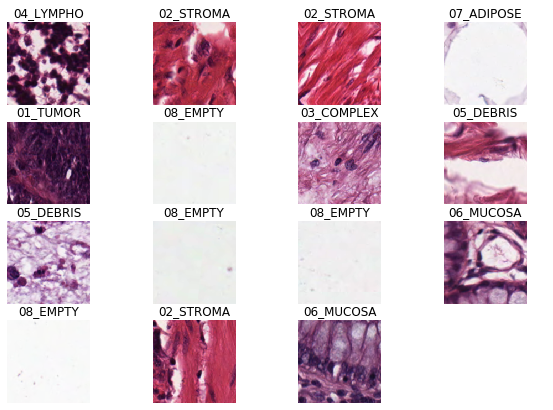

In [40]:
dbunch.show_batch(max_n=15, figsize=(10,7))

In [41]:
dbunch.vocab

(#8) [01_TUMOR,02_STROMA,03_COMPLEX,04_LYMPHO,05_DEBRIS,06_MUCOSA,07_ADIPOSE,08_EMPTY]

In [42]:
dbunch.vocab.o2i


{'01_TUMOR': 0,
 '02_STROMA': 1,
 '03_COMPLEX': 2,
 '04_LYMPHO': 3,
 '05_DEBRIS': 4,
 '06_MUCOSA': 5,
 '07_ADIPOSE': 6,
 '08_EMPTY': 7}

In [0]:
from torchvision.models import wide_resnet50_2

In [44]:
learn = cnn_learner(dbunch, wide_resnet50_2, pretrained=True, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /root/.cache/torch/checkpoints/wide_resnet50_2-95faca4d.pth
100%|██████████| 132M/132M [00:04<00:00, 28.1MB/s]


In [45]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.142206,0.602346,0.180000,01:31
1,0.744292,0.353308,0.126000,01:06
2,0.545688,0.263936,0.090000,01:06
3,0.463585,0.251167,0.085000,01:06
4,0.411316,0.242952,0.092000,01:07


In [0]:
learn.save('stage_1')

In [47]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

len(dbunch.valid_ds)==len(losses)==len(idxs)

epoch,train_loss,valid_loss,error_rate,time
0,1.142206,0.602346,0.180000,01:31
1,0.744292,0.353308,0.126000,01:06
2,0.545688,0.263936,0.090000,01:06
3,0.463585,0.251167,0.085000,01:06
4,0.411316,0.242952,0.092000,01:07


True

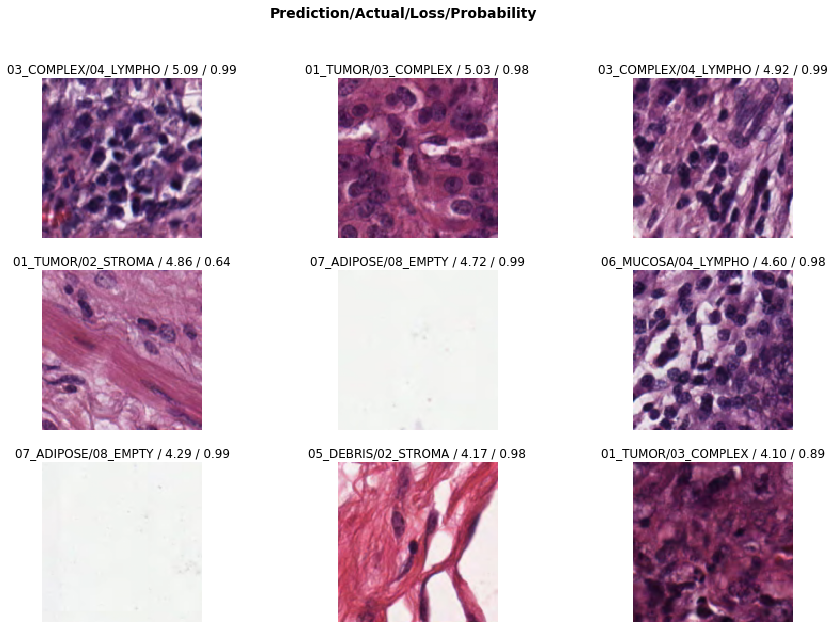

In [48]:
interp.plot_top_losses(9, figsize=(15,10))


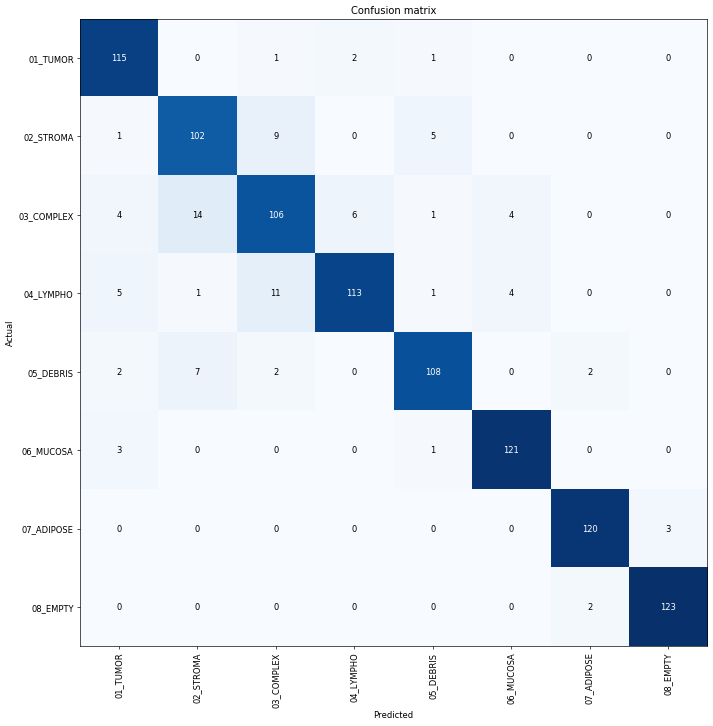

In [49]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [50]:
interp.most_confused(min_val=3)


[('03_COMPLEX', '02_STROMA', 14),
 ('04_LYMPHO', '03_COMPLEX', 11),
 ('02_STROMA', '03_COMPLEX', 9),
 ('05_DEBRIS', '02_STROMA', 7),
 ('03_COMPLEX', '04_LYMPHO', 6),
 ('02_STROMA', '05_DEBRIS', 5),
 ('04_LYMPHO', '01_TUMOR', 5),
 ('03_COMPLEX', '01_TUMOR', 4),
 ('03_COMPLEX', '06_MUCOSA', 4),
 ('04_LYMPHO', '06_MUCOSA', 4),
 ('06_MUCOSA', '01_TUMOR', 3),
 ('07_ADIPOSE', '08_EMPTY', 3)]

In [51]:
learn.load('stage_1')

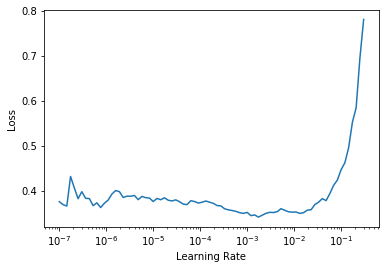

In [52]:
learn.lr_find()

In [53]:
learn.unfreeze()
#lets try again with a new learning rate!
learn.fit_one_cycle(4, lr_max=slice(1e-05, 1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.357598,0.232331,0.082000,01:35
1,0.334775,0.204696,0.073000,01:30
2,0.297272,0.187118,0.069000,01:31
3,0.256942,0.188301,0.072000,01:31


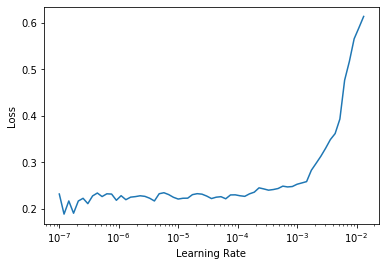

In [54]:
learn.lr_find()

In [55]:
learn.fit_one_cycle(4, lr_max=slice(1e-06, 1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.265324,0.187580,0.067000,01:30
1,0.250940,0.187702,0.063000,01:31
2,0.233479,0.186164,0.067000,01:31
3,0.235053,0.184776,0.068000,01:31


In [56]:
learn.fit_one_cycle(10, lr_max=slice(1e-06, 1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.233341,0.181998,0.063000,01:30
1,0.231369,0.181997,0.064000,01:31
2,0.241781,0.178696,0.070000,01:30
3,0.231438,0.177734,0.064000,01:31
4,0.232242,0.177629,0.068000,01:31
5,0.217328,0.175638,0.061000,01:30
6,0.220629,0.171957,0.061000,01:31
7,0.209055,0.175897,0.066000,01:30
8,0.214563,0.172984,0.059000,01:31
9,0.212100,0.173476,0.061000,01:31


In [57]:
learn.fit_one_cycle(10, lr_max=slice(1e-06, 1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.209697,0.174005,0.058000,01:30
1,0.211694,0.171194,0.065000,01:31
2,0.202623,0.167464,0.060000,01:30
3,0.206536,0.168338,0.062000,01:31
4,0.199112,0.164410,0.059000,01:31
5,0.188818,0.170454,0.065000,01:30
6,0.207028,0.167873,0.060000,01:31
7,0.198556,0.163201,0.060000,01:31
8,0.196689,0.164385,0.061000,01:31
9,0.185792,0.165025,0.058000,01:31


In [58]:
learn.fit_one_cycle(4, lr_max=slice(1e-06, 1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.188584,0.164507,0.057000,01:31
1,0.194633,0.168259,0.058000,01:31
2,0.192430,0.163030,0.060000,01:31
3,0.190118,0.168934,0.059000,01:31


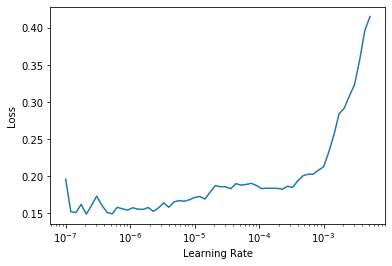

In [59]:
learn.lr_find()

In [62]:
learn.fit_one_cycle(4, lr_max=slice(5e-05, 5e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.185099,0.179619,0.060000,01:30
1,0.180670,0.191057,0.058000,01:31
2,0.145509,0.150196,0.052000,01:31
3,0.108509,0.150770,0.048000,01:30


In [68]:
learn.save('stage_2')
learn.load('stage_2')

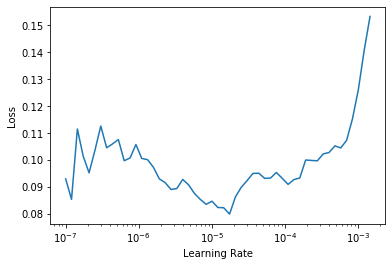

In [69]:
learn.lr_find()

In [70]:
learn.fit_one_cycle(5, lr_max=slice(5e-05, 2e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.106651,0.143983,0.052000,01:29
1,0.103146,0.137743,0.045000,01:30
2,0.093771,0.140573,0.047000,01:30
3,0.077840,0.125437,0.041000,01:30
4,0.061496,0.121353,0.038000,01:30


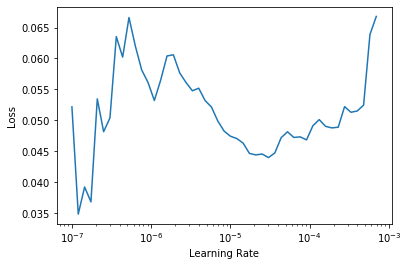

In [71]:
learn.lr_find()

In [72]:
learn.fit_one_cycle(5, lr_max=slice(2e-06, 2e-05))

epoch,train_loss,valid_loss,error_rate,time
0,0.049121,0.123961,0.036000,01:30
1,0.042512,0.122566,0.039000,01:30
2,0.042326,0.123088,0.040000,01:30
3,0.038014,0.126572,0.039000,01:30
4,0.043686,0.129132,0.037000,01:31


In [0]:
learn.lr_find()